In [150]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


In [151]:
csv_path = "near_miss_data.csv"

df = pd.read_csv(csv_path)
print(df.shape)
print(df.columns)


(1120, 59)
Index(['ID', 'RESIDENTIAL', 'BUSINESS', 'RURAL', 'ONE_WAY', 'BOTH_WAY',
       'SIDE_1', 'SIDE_2', 'SIDE_3', 'SIDE_4', 'INTERSECTION3',
       'INTERSECTION4', 'LANE_1', 'LANE_2', 'LANE_3', 'CROSS_NO', 'CROSS_YES',
       'STOPCAR_ZERO', 'STOPCAR_LOW', 'STOPCAR_MID', 'STOPCAR_HIGH',
       'PEDESTRIAN_LOW', 'PEDESTRIAN_MID', 'PEDESTRIAN_HIGH', 'TRAFFIC_LOW',
       'TRAFFIC_MID', 'TRAFFIC_HIGH', 'LEAD_NO', 'LEAD_YES', 'SUNNY', 'RAIN',
       'TIME6_10', 'TIME10_16', 'TIME16_20', 'TIME20_6', 'AGE_UNKOWN',
       'AGE_OLDER', 'AGE_MATURE', 'AGE_YOUNG', 'AGE_CHILD', 'SIGNAL_NO',
       'SIGNAL_YES', 'Y_SIGNAL_NO', 'Y_SIGNAL_YES', 'YGAP', 'VLIM',
       'BRIGHTNESS', 'SCT', 'TTC', 'VCAR', 'V4', 'AX7', 'DBLIND', 'DOBJ',
       'PET', 'V_OBJ', 'YEAR', 'MONTH', 'TIME'],
      dtype='object')


In [152]:
# This is the data analysis of near miss data
# An attempt to predict the SCT metric based on the other relevant and fair features were made based on following models:
# Random Forest, Linear Regression, Gradient Boosting and Neural Network



In [153]:
# can try to train different feature subsets
# features that are included in the calculation of SCT or highly related to SCT are excluded from the feature set (forbidden_cols)
# this experiment uses categorical, numerical and combined
target = "SCT"

forbidden_cols = [
    "ID", "SCT", "TTC", "PET",
    "V4", "AX7", "V_OBJ"
]
numerical_cols = [
        'YGAP', 'VLIM',
       'BRIGHTNESS', 'VCAR', 'DBLIND', 'DOBJ',
       'YEAR', 'MONTH', 'TIME'
]
categorical_cols = [
    'RESIDENTIAL', 'BUSINESS', 'RURAL', 'ONE_WAY', 'BOTH_WAY',
       'SIDE_1', 'SIDE_2', 'SIDE_3', 'SIDE_4', 'INTERSECTION3',
       'INTERSECTION4', 'LANE_1', 'LANE_2', 'LANE_3', 'CROSS_NO', 'CROSS_YES',
       'STOPCAR_ZERO', 'STOPCAR_LOW', 'STOPCAR_MID', 'STOPCAR_HIGH',
       'PEDESTRIAN_LOW', 'PEDESTRIAN_MID', 'PEDESTRIAN_HIGH', 'TRAFFIC_LOW',
       'TRAFFIC_MID', 'TRAFFIC_HIGH', 'LEAD_NO', 'LEAD_YES', 'SUNNY', 'RAIN',
       'TIME6_10', 'TIME10_16', 'TIME16_20', 'TIME20_6', 'AGE_UNKOWN',
       'AGE_OLDER', 'AGE_MATURE', 'AGE_YOUNG', 'AGE_CHILD', 'SIGNAL_NO',
       'SIGNAL_YES', 'Y_SIGNAL_NO', 'Y_SIGNAL_YES'
]

In [154]:
# change the forbidden_cols part to num or categorical for other results (remove not)
# all features
FEATURE_COLS = [c for c in df.columns if c not in forbidden_cols]
print("Number of features:", len(FEATURE_COLS))
FEATURE_COLS

Number of features: 52


['RESIDENTIAL',
 'BUSINESS',
 'RURAL',
 'ONE_WAY',
 'BOTH_WAY',
 'SIDE_1',
 'SIDE_2',
 'SIDE_3',
 'SIDE_4',
 'INTERSECTION3',
 'INTERSECTION4',
 'LANE_1',
 'LANE_2',
 'LANE_3',
 'CROSS_NO',
 'CROSS_YES',
 'STOPCAR_ZERO',
 'STOPCAR_LOW',
 'STOPCAR_MID',
 'STOPCAR_HIGH',
 'PEDESTRIAN_LOW',
 'PEDESTRIAN_MID',
 'PEDESTRIAN_HIGH',
 'TRAFFIC_LOW',
 'TRAFFIC_MID',
 'TRAFFIC_HIGH',
 'LEAD_NO',
 'LEAD_YES',
 'SUNNY',
 'RAIN',
 'TIME6_10',
 'TIME10_16',
 'TIME16_20',
 'TIME20_6',
 'AGE_UNKOWN',
 'AGE_OLDER',
 'AGE_MATURE',
 'AGE_YOUNG',
 'AGE_CHILD',
 'SIGNAL_NO',
 'SIGNAL_YES',
 'Y_SIGNAL_NO',
 'Y_SIGNAL_YES',
 'YGAP',
 'VLIM',
 'BRIGHTNESS',
 'VCAR',
 'DBLIND',
 'DOBJ',
 'YEAR',
 'MONTH',
 'TIME']

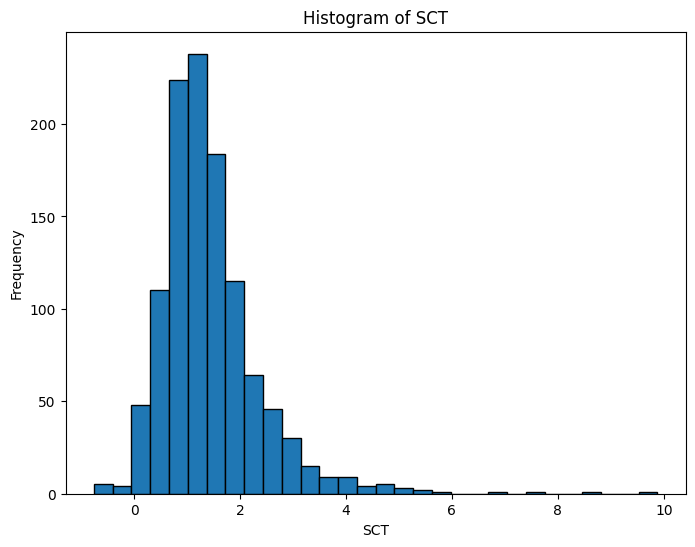

In [155]:
#sct histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['SCT'], bins=30, edgecolor='black')
plt.title('Histogram of SCT')
plt.xlabel('SCT')
plt.ylabel('Frequency')
plt.show()

In [156]:
FEATURE_COLS = [c for c in df.columns if c not in forbidden_cols]
X = df[FEATURE_COLS]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [157]:
# random forest model

rf_pipeline = Pipeline([
    ("rf", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)
y_pred_rf_train = rf_pipeline.predict(X_train)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf_train = mean_squared_error(y_train, y_pred_rf_train, squared=False)
r2_rf_train = r2_score(y_train, y_pred_rf_train)

print(f"Random Forest Train RMSE: {rmse_rf_train:.3f}")
print(f"Random Forest Train R²:   {r2_rf_train:.3f}")
print(f"Random Forest Test RMSE: {rmse_rf:.3f}")
print(f"Random Forest Test R²:   {r2_rf:.3f}")


Random Forest Train RMSE: 0.164
Random Forest Train R²:   0.972
Random Forest Test RMSE: 0.341
Random Forest Test R²:   0.856


/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [158]:
# linear regression model
from sklearn.linear_model import LinearRegression

lr_pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("lr", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)
y_pred_lr_train = lr_pipeline.predict(X_train)

rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr_train = mean_squared_error(y_train, y_pred_lr_train, squared=False)
r2_lr_train = r2_score(y_train, y_pred_lr_train)

print(f"Linear Regression Train RMSE: {rmse_lr_train:.3f}")
print(f"Linear Regression Train R²:   {r2_lr_train:.3f}")
print(f"Linear Regression Test RMSE: {rmse_lr:.3f}")
print(f"Linear Regression Test R²:   {r2_lr:.3f}")

Linear Regression Train RMSE: 0.441
Linear Regression Train R²:   0.794
Linear Regression Test RMSE: 0.324
Linear Regression Test R²:   0.870


/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [159]:
# data preprocessing before neural network 

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

X_train_t = torch.tensor(X_train_s, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test_s, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [160]:
# custom stc dataset for nn
from dataset import SCTDataset

# dataloader
train_ds = SCTDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)

In [161]:
from neuralnet import SCTNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# neural network for stc prediction
model = SCTNet(X_train_t.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
criterion = nn.MSELoss()


In [162]:
# training loop 
for epoch in range(200):
    model.train()
    total_loss = 0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * len(xb)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:02d} | Train MSE: {total_loss / len(train_ds):.4f}")


Epoch 00 | Train MSE: 1.9999
Epoch 10 | Train MSE: 0.3717
Epoch 10 | Train MSE: 0.3717
Epoch 20 | Train MSE: 0.2041
Epoch 20 | Train MSE: 0.2041
Epoch 30 | Train MSE: 0.1714
Epoch 40 | Train MSE: 0.1595
Epoch 30 | Train MSE: 0.1714
Epoch 40 | Train MSE: 0.1595
Epoch 50 | Train MSE: 0.1209
Epoch 50 | Train MSE: 0.1209
Epoch 60 | Train MSE: 0.0973
Epoch 70 | Train MSE: 0.1357
Epoch 60 | Train MSE: 0.0973
Epoch 70 | Train MSE: 0.1357
Epoch 80 | Train MSE: 0.0997
Epoch 90 | Train MSE: 0.0859
Epoch 80 | Train MSE: 0.0997
Epoch 90 | Train MSE: 0.0859
Epoch 100 | Train MSE: 0.0885
Epoch 110 | Train MSE: 0.0720
Epoch 100 | Train MSE: 0.0885
Epoch 110 | Train MSE: 0.0720
Epoch 120 | Train MSE: 0.0779
Epoch 130 | Train MSE: 0.0742
Epoch 120 | Train MSE: 0.0779
Epoch 130 | Train MSE: 0.0742
Epoch 140 | Train MSE: 0.0599
Epoch 140 | Train MSE: 0.0599
Epoch 150 | Train MSE: 0.0721
Epoch 150 | Train MSE: 0.0721
Epoch 160 | Train MSE: 0.0732
Epoch 160 | Train MSE: 0.0732
Epoch 170 | Train MSE: 0.0642

In [163]:
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_t.to(device)).cpu().numpy().ravel()

rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network RMSE: {rmse_nn:.3f}")
print(f"Neural Network R²:   {r2_nn:.3f}")


Neural Network RMSE: 0.173
Neural Network R²:   0.963


/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [164]:
# gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor

gb_pipeline = Pipeline([
    ("gb", GradientBoostingRegressor(
        n_estimators=300,
        max_depth=5,
        random_state=42
    ))
])

gb_pipeline.fit(X_train, y_train)

y_pred_gb = gb_pipeline.predict(X_test)
y_pred_gb_train = gb_pipeline.predict(X_train)

rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

rmse_gb_train = mean_squared_error(y_train, y_pred_gb_train, squared=False)
r2_gb_train = r2_score(y_train, y_pred_gb_train)

print(f"Gradient Boosting Train RMSE: {rmse_gb_train:.3f}")
print(f"Gradient Boosting Train R²:   {r2_gb_train:.3f}")
print(f"Gradient Boosting Test RMSE: {rmse_gb:.3f}")
print(f"Gradient Boosting Test R²:   {r2_gb:.3f}")

Gradient Boosting Train RMSE: 0.008
Gradient Boosting Train R²:   1.000
Gradient Boosting Test RMSE: 0.260
Gradient Boosting Test R²:   0.916


/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [165]:
# evaluation across multiple seeds

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import torch

def evaluation(X, y):
    # Define models
    models = {
        'Random Forest': Pipeline([("rf", RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1))]),
        'Linear Regression': Pipeline([("scaler", StandardScaler()), ("lr", LinearRegression())]),
        'Gradient Boosting': Pipeline([("gb", GradientBoostingRegressor(n_estimators=300, max_depth=5, random_state=42))]),
        'Neural Network': None  # Special handling
    }
    # Metrics storage
    results = {model: {'train_rmse': [], 'train_r2': [], 'test_rmse': [], 'test_r2': []} for model in models}

    num_seeds = 10

    for seed in range(num_seeds):
        # Redefined it for the seed consistency, however not optimal since it repeats
        models = {
            'Random Forest': Pipeline([("rf", RandomForestRegressor(n_estimators=300, max_depth=None, random_state=seed, n_jobs=-1))]),
            'Linear Regression': Pipeline([("scaler", StandardScaler()), ("lr", LinearRegression())]),
            'Gradient Boosting': Pipeline([("gb", GradientBoostingRegressor(n_estimators=300, max_depth=5, random_state=seed))]),
            'Neural Network': None  # Special handling
        }
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        for model_name, pipeline in models.items():
            if model_name == 'Neural Network':
                # Neural network
                scaler = StandardScaler()
                X_train_s = scaler.fit_transform(X_train)
                X_test_s = scaler.transform(X_test)
                X_train_t = torch.tensor(X_train_s, dtype=torch.float32)
                y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
                X_test_t = torch.tensor(X_test_s, dtype=torch.float32)
                y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

                train_ds = SCTDataset(X_train_t, y_train_t)
                train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)

                model = SCTNet(X_train_t.shape[1]).to(device)
                optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
                criterion = nn.MSELoss()

                for epoch in range(200):  
                    model.train()
                    total_loss = 0
                    for xb, yb in train_loader:
                        xb, yb = xb.to(device), yb.to(device)
                        optimizer.zero_grad()
                        pred = model(xb)
                        loss = criterion(pred, yb)
                        loss.backward()
                        optimizer.step()
                        total_loss += loss.item() * len(xb)

                # Evaluate
                model.eval()
                with torch.no_grad():
                    y_pred_train = model(X_train_t.to(device)).cpu().numpy().ravel()
                    y_pred_test = model(X_test_t.to(device)).cpu().numpy().ravel()

                rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
                r2_train = r2_score(y_train, y_pred_train)
                rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
                r2_test = r2_score(y_test, y_pred_test)
            else:
                pipeline.fit(X_train, y_train)
                y_pred_train = pipeline.predict(X_train)
                y_pred_test = pipeline.predict(X_test)

                rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
                r2_train = r2_score(y_train, y_pred_train)
                rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
                r2_test = r2_score(y_test, y_pred_test)

            results[model_name]['train_rmse'].append(rmse_train)
            results[model_name]['train_r2'].append(r2_train)
            results[model_name]['test_rmse'].append(rmse_test)
            results[model_name]['test_r2'].append(r2_test)

    # Compute averages
    print("Average Performance over 100 Seeds:")
    for model_name in results:
        avg_train_rmse = np.mean(results[model_name]['train_rmse'])
        avg_train_r2 = np.mean(results[model_name]['train_r2'])
        avg_test_rmse = np.mean(results[model_name]['test_rmse'])
        avg_test_r2 = np.mean(results[model_name]['test_r2'])
        print(f"{model_name}:")
        print(f"  Train RMSE: {avg_train_rmse:.3f}, Train R²: {avg_train_r2:.3f}")
        print(f"  Test RMSE: {avg_test_rmse:.3f}, Test R²: {avg_test_r2:.3f}")
        print()

    # Boxplot for test RMSE
    plt.figure(figsize=(10, 6))
    test_rmse_data = [results[model]['test_rmse'] for model in results]
    plt.boxplot(test_rmse_data, labels=results.keys())
    plt.title('Test RMSE Comparison Across Models')
    plt.ylabel('RMSE')
    plt.yscale('log')
    plt.show()

/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 an

Average Performance over 100 Seeds:
Random Forest:
  Train RMSE: 0.154, Train R²: 0.974
  Test RMSE: 0.401, Test R²: 0.828

Linear Regression:
  Train RMSE: 0.416, Train R²: 0.811
  Test RMSE: 147810293332.913, Test R²: -160687956761357466992640.000

Gradient Boosting:
  Train RMSE: 0.008, Train R²: 1.000
  Test RMSE: 0.320, Test R²: 0.887

Neural Network:
  Train RMSE: 0.105, Train R²: 0.988
  Test RMSE: 0.287, Test R²: 0.909



/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


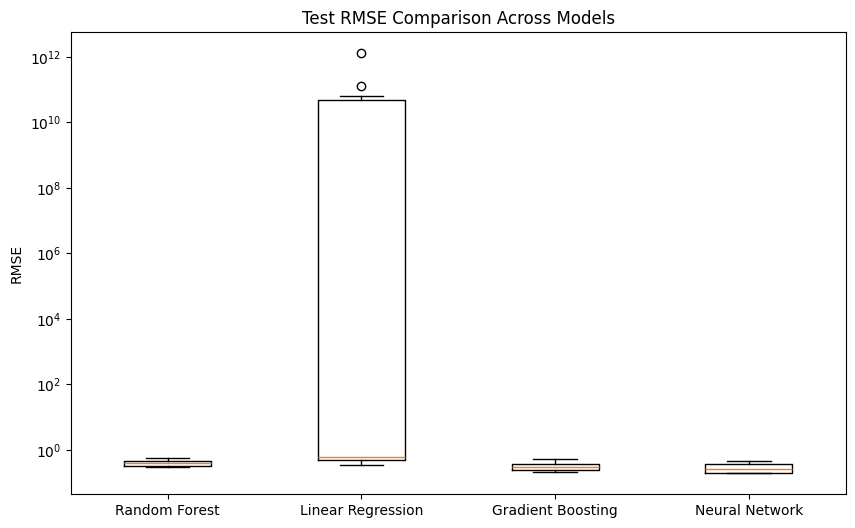

In [166]:
# On all features except forbidden cols
FEATURE_COLS = [c for c in df.columns if c not in forbidden_cols]
X = df[FEATURE_COLS]
y = df[target]

evaluation(X, y)


/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 an

Average Performance over 100 Seeds:
Random Forest:
  Train RMSE: 0.143, Train R²: 0.978
  Test RMSE: 0.382, Test R²: 0.843

Linear Regression:
  Train RMSE: 0.425, Train R²: 0.802
  Test RMSE: 0.406, Test R²: 0.822

Gradient Boosting:
  Train RMSE: 0.010, Train R²: 1.000
  Test RMSE: 0.305, Test R²: 0.898

Neural Network:
  Train RMSE: 0.102, Train R²: 0.988
  Test RMSE: 0.193, Test R²: 0.956



/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


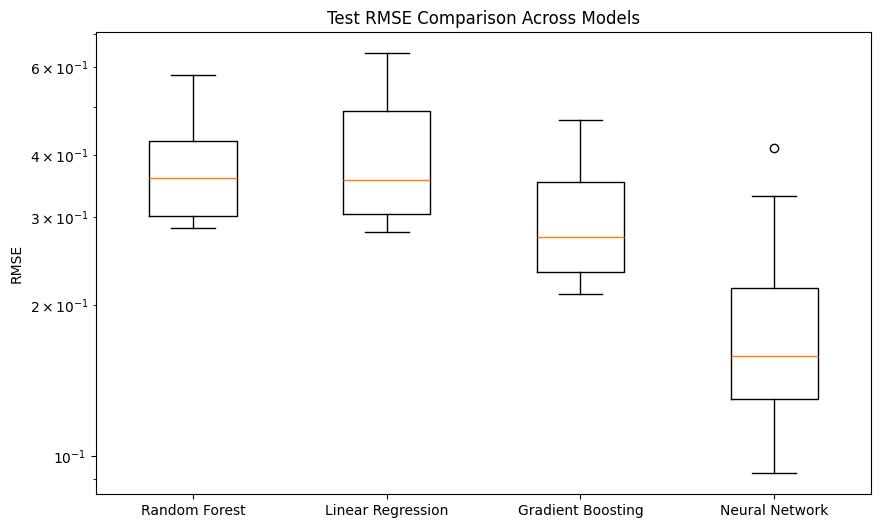

In [167]:
# numerical cols except forbidden cols
FEATURE_COLS = [c for c in df.columns if c in numerical_cols]
X = df[FEATURE_COLS]
y = df[target]

evaluation(X, y)

/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 an

Average Performance over 100 Seeds:
Random Forest:
  Train RMSE: 0.455, Train R²: 0.773
  Test RMSE: 1.026, Test R²: -0.155

Linear Regression:
  Train RMSE: 0.914, Train R²: 0.087
  Test RMSE: 560993603998.749, Test R²: -1620583414849441280032768.000

Gradient Boosting:
  Train RMSE: 0.446, Train R²: 0.783
  Test RMSE: 1.130, Test R²: -0.425

Neural Network:
  Train RMSE: 0.454, Train R²: 0.774
  Test RMSE: 1.040, Test R²: -0.195



/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eric/anaconda3/envs/altenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


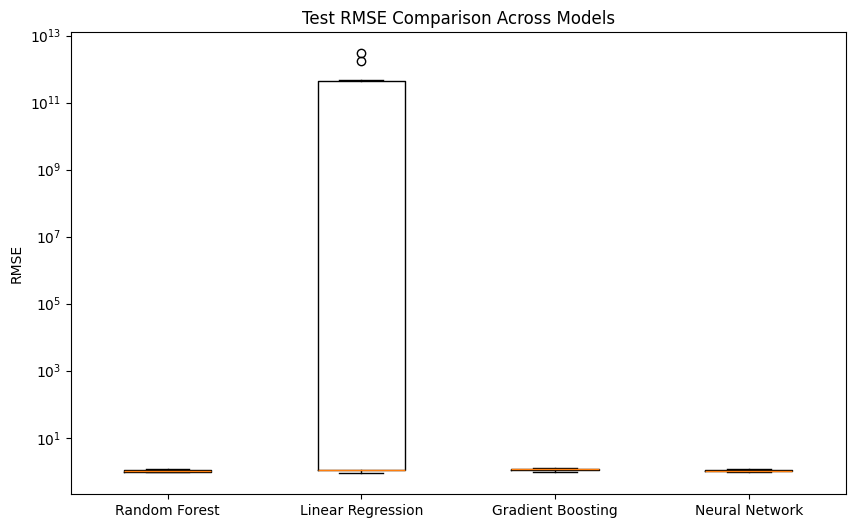

In [168]:
# categorical cols except forbidden cols
FEATURE_COLS = [c for c in df.columns if c in categorical_cols]
X = df[FEATURE_COLS]
y = df[target]

evaluation(X, y)